# Лабораторная работа 1 (вариант 2)

## Решение систем ОДУ обычного типа

Выполнил: Шумаков Иван Б01-009

### Постановка задачи

Изучить поведение численного решения ОДУ второго порядка:

$$ y'' + e(y^2 - 1)y' + y = 0 $$

Представление в виде системы уравнений:

$$ \frac{d y}{dt} = z \\
   \frac{d z}{dt} = z (1 - y^2)e - y 
$$

Для решения были выбраны 2 метода:
1) явный метод Рунге-Кутты 3 порядка:
   метод Хойна 3-го порядка

2) явный многошаговый метод 3 порядка:
   метод Нистрема 3-го порядка

По данным уравнениям будут построены фазовые кривые в координатах (y, z)

#### Метод Хойна 3 порядка

Таблица Бутчера:

$$
\begin{matrix}
0           & |       0     &       0     &  0 \\
\frac{1}{3} & | \frac{1}{3} &       0     &  0 \\
\frac{2}{3} & |       0     & \frac{2}{3} &  0 \\
 -          &  -            &    -        &  - \\
            & | \frac{1}{4} &       0     & \frac{3}{4}     
\end{matrix}
$$

Общий вид уравнения:
$$
f = f(t, y, z) \\
$$

$$
\begin{equation}
\frac{d}{dt}
   \begin{pmatrix}
      y \\
      z
   \end{pmatrix}
= f(t, y, z)
\end{equation}
$$

$$
\begin{equation}
f = 
\begin{pmatrix}
  z                      \\
  z (1 - y^2)e - y
\end{pmatrix}
\end{equation}
$$

Этапы метода:
$$
y_{i + 1} = y_i + \frac{K_1}{4} + \frac{3 K_3}{4}
$$

$$
K1 = h * f(t_i, y_i, z_i) \\
K2 = h * f(t_i + \frac{h}{3}, y_i + \frac{K1_1}{3}, z_i + \frac{K1_2}{3}) \\
K3 = h * f(t_i + \frac{2h}{3}, y_i + \frac{2 K2_1}{3}, z_i + \frac{2 K2_2}{3})
$$

#### Нестремый метод Нистрёма

$$
\begin{equation}
f = 
\begin{pmatrix}
  y \\
  z
\end{pmatrix}
\end{equation}
$$

$$
u_{n + 2} = u_{n} + 2 h f(t_{n + 1}, u_{n + 1}) \\
u_{n + 3} = u_{n + 1} + \frac{1}{3} h (7 f(t_{n + 2}, u_{n + 2}) - 2 f(t_{n + 1}, u_{n + 1}) + f(t_{n}, u_{n}))\\
u_{n + 4} = u_{n + 2} + \frac{1}{3} h (8 f(t_{n + 3}, u_{n + 3}) - 5 f(t_{n + 2}, u_{n + 2}) + 4 f(t_{n + 1}, u_{n + 1}) - f(t_{n}, u_{n}))
$$

Опытным путем было выяснено, что этот метод расходится, поэтому был взят метод Адамса 4 порядка.

#### Метода Адамса-Башфорта 4 порядка

$$
u_{n + 1} = u_{n} + h f(t_{n}, u_{n}) \\
u_{n + 2} = u_{n + 1} + h ( \frac{3}{2} f( t_{n + 1}, u_{n + 1}) - \frac{1}{2} f(t_{n}, u_{n})) \\
u_{n + 3} = u_{n + 2} + h (\frac{23}{12} f(t_{n + 2}, u_{n + 2}) - \frac{4}{3} f(t_{n + 1}, u_{n + 1}) + \frac{5}{12}f(t_{n}, u_{n}))\\
u_{n + 4} = u_{n + 3} + h (\frac{55}{24} f(t_{n + 3}, u_{n + 3}) - \frac{59}{24} f(t_{n + 2}, u_{n + 2}) + \frac{37}{24} f(t_{n + 1}, u_{n + 1}) - \frac{3}{8} f(t_{n}, u_{n}))
$$

### Исследование задачи

#### Метод Хойна 3 порядка

Для исследования задачи были построены фазовые кривые для разных параметорв e:


Метод Хойна при e{1, 41}


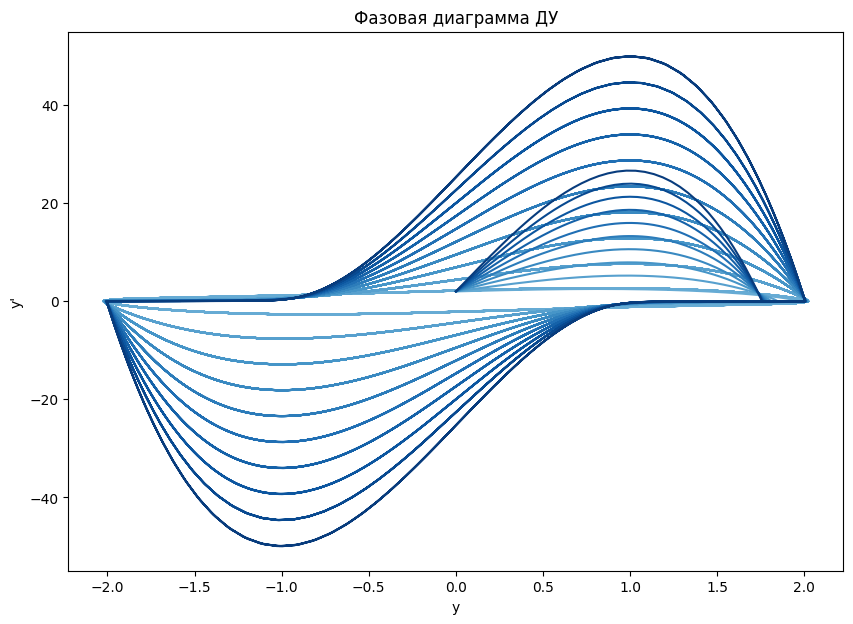

In [2]:
import Graph as gr
import HeunMethod as hn
import Func 

import numpy as np

print('Метод Хойна при e{1, 41}')
init_pos = np.array([[0.0], [2.0]])
ax = gr.initPlot()
e_min = 1
e_max = 41
for e in range(e_min, e_max, 4):
  Func.e_param = e
  res = hn.HeunFunc(initial_pos=init_pos, h=0.002, iter_num=100000)
  color = gr.color_map_color(e, vmin=-e_max, vmax=e_max)
  gr.draw(res, ax, color)
gr.show()

По графику видно, что при увеличени параметра e фазовая трактория стремится к предельному циклу `утки`. Также можно заметить, что решение устойчиво только при определенных параметрах h, которые определяются константой e:

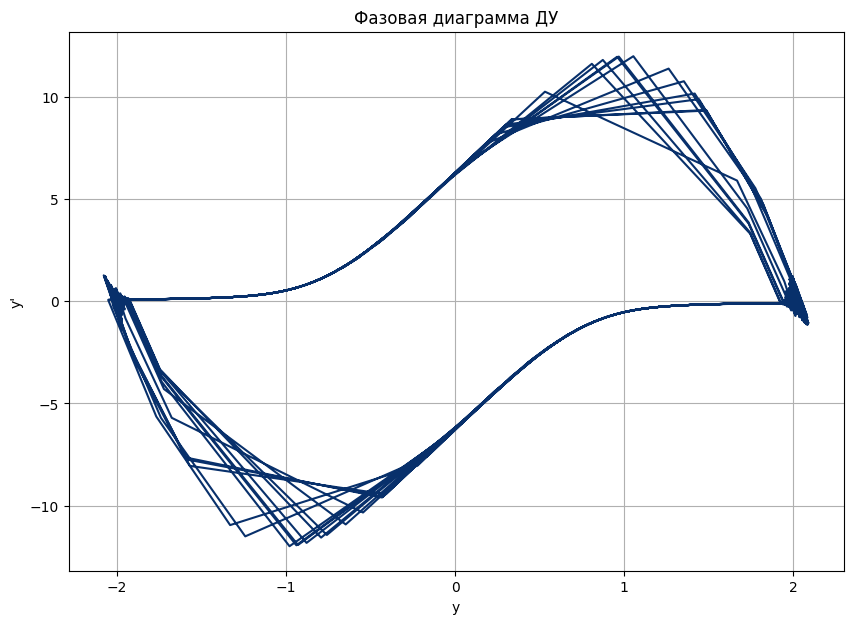

In [13]:
init_pos = np.array([[2.0], [0.0]])
ax = gr.initPlot()

Func.e_param = 8
res = hn.HeunFunc(initial_pos=init_pos, h=0.1, iter_num=2000)
gr.draw(res, ax, gr.color_map_color(1))
gr.show()

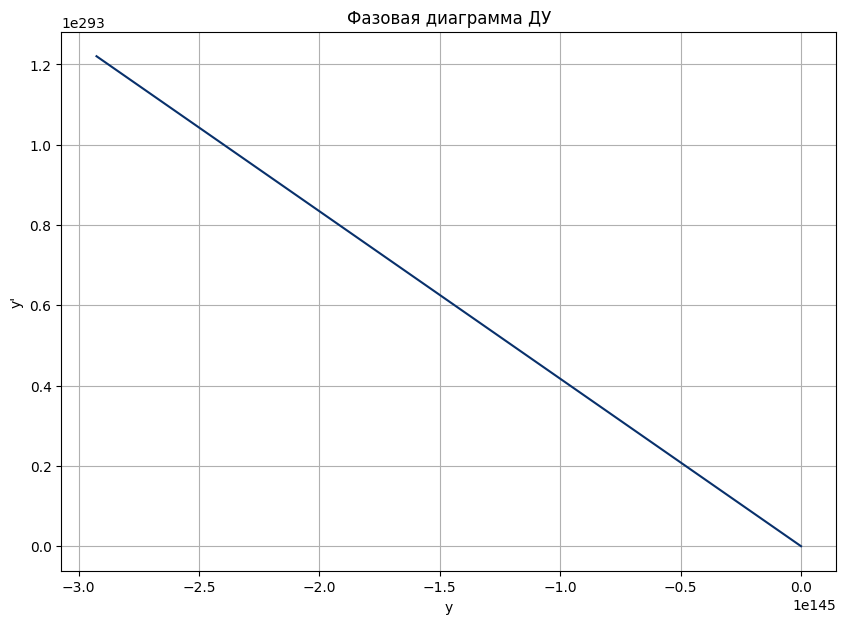

In [7]:
init_pos = np.array([[2.0], [0]])
ax = gr.initPlot()

Func.e_param = 80
res = hn.HeunFunc(initial_pos=init_pos, h=0.1, iter_num=200000)
gr.draw(res, ax, gr.color_map_color(1))
gr.show()

По графикам выше видно, что в первом случае метод сходится, а во втором расходится при одинаковых параметрах h, но разных е.

Если уменьшить шаг, то и при таком значении e меитод буд сходиться.

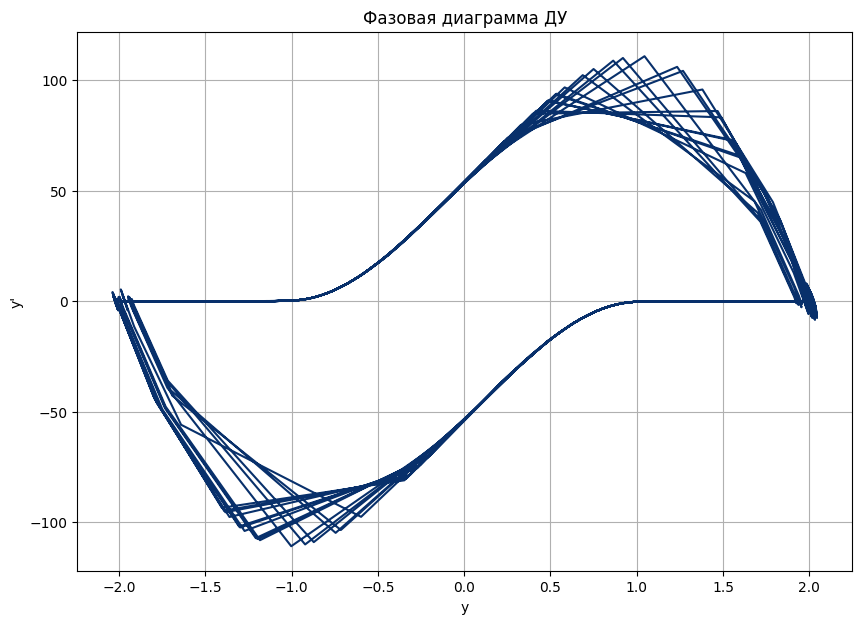

In [8]:
ax = gr.initPlot()

Func.e_param = 80
res = hn.HeunFunc(initial_pos=init_pos, h=0.01, iter_num=200000)
gr.draw(res, ax, gr.color_map_color(1))
gr.show()

#### Многошаговый метод Адамса
Для многошагового метода Адамса были получены графики:

Метод Адамса при e{1, 41}


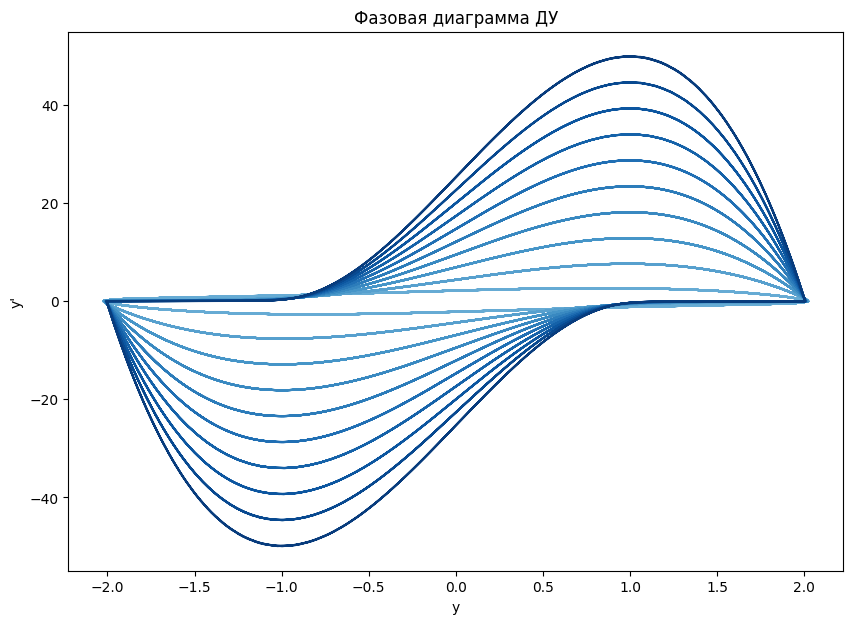

In [10]:
import AdamsMethod as ad

print('Метод Адамса при e{1, 41}')
init_pos = np.array([[2.0], [0]])
ax = gr.initPlot()
e_min = 1
e_max = 41
for e in range(e_min, e_max, 4):
  Func.e_param = e
  res = ad.AdamsFunc(initial_pos=init_pos, h=0.002, iter_num=100000)
  color = gr.color_map_color(e, vmin=-e_max, vmax=e_max)
  gr.draw(res, ax, color)
gr.show()

Время исполнения и получившаяся фазова ядиаграмма совпадают с прошлым методом Хойна.
Фазовая картина при малом h:

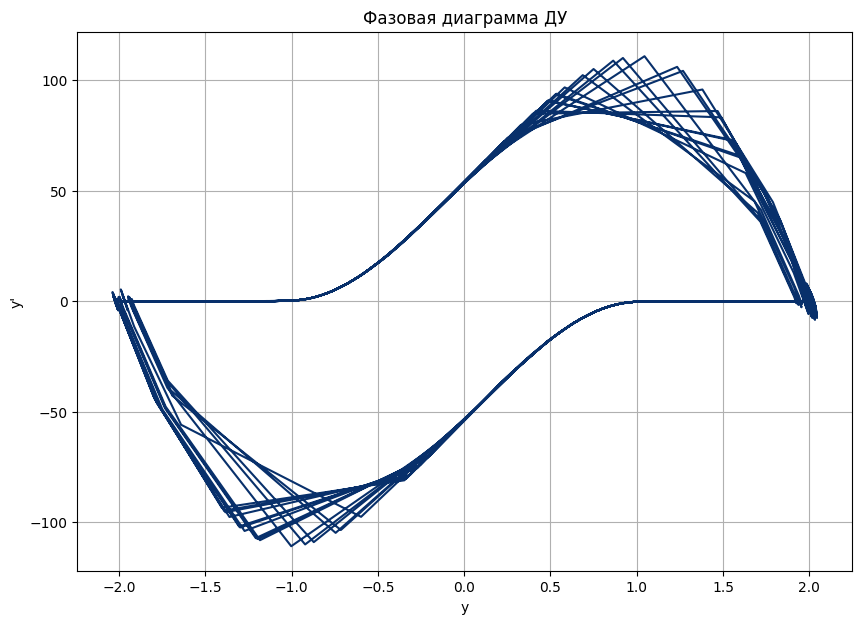

In [11]:
ax = gr.initPlot()

Func.e_param = 80
res = hn.HeunFunc(initial_pos=init_pos, h=0.01, iter_num=200000)
gr.draw(res, ax, gr.color_map_color(1))
gr.show()

## Вывод
В данной лабораторной работе были изучены методы Адамса и Хойна. В качестве задачи было выбрано уравнение Ван-дер-Поля с малым параметром e. При достаточно малом шаге оба метода сходились.